In [89]:
# import library
import pandas as pd
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [62]:
#import data after preprocessing
train_df = pd.read_csv("./project_data_files/book_rating_train.csv")
test_df = pd.read_csv("./project_data_files/book_rating_test.csv")
X_train = load_npz('./x_train_5000_x2.npz')
X_test = load_npz('./x_test_5000.npz')
y_train = train_df['rating_label']

In [61]:
# split train and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(y_val)

247      4.0
12038    3.0
1580     4.0
3128     4.0
20531    4.0
        ... 
12586    3.0
7683     4.0
12912    4.0
9134     4.0
7893     4.0
Name: rating_label, Length: 4613, dtype: float64


In [63]:
def output_predictions(prediction):
    #output result
    output_df = pd.DataFrame({'rating_label': prediction})
    output_df.index += 1
    output_df.index.name = 'id'
    output_df.to_csv('./predictions.csv')
    return

In [64]:
#try XGboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

dtrain = xgb.DMatrix(X_train, label=y_train-3)
dval = xgb.DMatrix(X_val, label=y_val-3)

In [65]:
params = {
    'max_depth': list(range(50, 80, 10)),
    'min_child_weight': list(range(1, 6, 2)),
}

gsearch = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate = 0.2, objective='multi:softmax', subsample = 0.8, colsample_bytree=0.8, 
                                                   random_state = 42, num_class = 3), param_grid=params, n_jobs=4, cv=3)
gsearch.fit(X_train, y_train-3)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_l

In [66]:
print( gsearch.best_params_, gsearch.best_score_)

{'max_depth': 50, 'min_child_weight': 1} 0.709924930581567


In [70]:
params = {
    'gamma': [i/10 for i in range(0, 5)]
}
gsearch = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate = 0.2, objective='multi:softmax', subsample = 0.8, colsample_bytree=0.8, 
                                                   random_state = 42, num_class = 3, alpha = 3, max_depth = 50, min_child_weight = 1), param_grid=params, cv=3)
gsearch.fit(X_train, y_train-3)

GridSearchCV(cv=3,
             estimator=XGBClassifier(alpha=3, base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=50,
                                   

In [72]:
print( gsearch.best_params_, gsearch.best_score_)

{'gamma': 0.4} 0.7067597458236472


In [74]:
params = {
    'subsample': [0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree': [0.5,0.6,0.7,0.8,0.9]
}

gsearch = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate = 0.2, objective='multi:softmax',gamma = 1,
                                                   random_state = 42, num_class = 3, alpha = 3, max_depth = 50, min_child_weight = 1), param_grid=params, cv=3)
gsearch.fit(X_train, y_train-3)

GridSearchCV(cv=3,
             estimator=XGBClassifier(alpha=3, base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=1, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=50,
                                     max_leaves=None, min_child_weight=1,


In [76]:
print( gsearch.best_params_, gsearch.best_score_)

{'colsample_bytree': 0.5, 'subsample': 0.8} 0.7185101441812402


In [79]:
param = {
    'learning_rate': [0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
}
gsearch = GridSearchCV(estimator=xgb.XGBClassifier(objective='multi:softmax', subsample = 0.8, colsample_bytree=0.5, gamma = 1,
                                                   random_state = 42, num_class = 3, alpha = 3, max_depth = 50, min_child_weight = 1), param_grid=param, cv=3)
gsearch.fit(X_train, y_train-3)


GridSearchCV(cv=3,
             estimator=XGBClassifier(alpha=3, base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=1, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=50,
                                     max_leaves=None, min_child_weight=1,


In [80]:
print( gsearch.best_params_, gsearch.best_score_)

{'learning_rate': 0.08} 0.7181633340358994


In [81]:

param = {'learning_rate': 0.08, 
         'objective':'multi:softmax', 
         'subsample' : 0.8, 
         'colsample_bytree': 0.5, 
         'gamma': 1,
         'num_class': 3, 
         'max_depth': 50, 
         'min_child_weight': 1,
    
}
num_round = 1000

model = xgb.cv(param, dtrain, num_boost_round=num_round, nfold = 3, metrics='auc', callbacks=[
    xgb.callback.EarlyStopping(50)
])

In [82]:
print(model.shape[0])

144


In [85]:
num_round = 144
model = xgb.train(param, dtrain, num_boost_round=num_round)

In [86]:
dtest = xgb.DMatrix(X_val)
y_pred = model.predict(dtest)
y_pred = [round(value) for value in y_pred]
accuracy = accuracy_score(y_val-3, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.61%


In [90]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,7))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt


C:\Users\Olivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\Olivia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

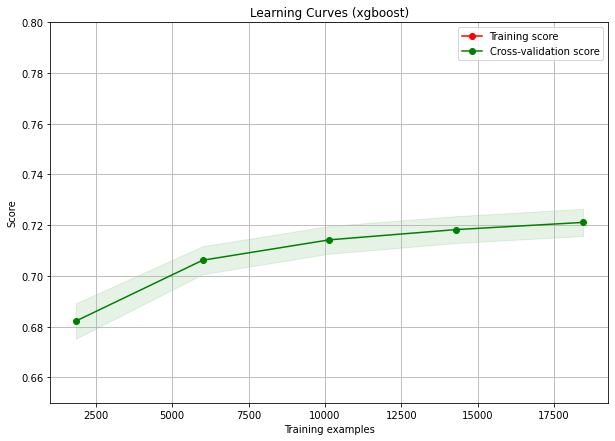

In [94]:
title = r"Learning Curves (xgboost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = xgb.XGBClassifier(param, n_estimators = 144)    #建模
plot_learning_curve(estimator, title, X_train, y_train-3, ylim=(0.65, 0.8), cv=cv, n_jobs=1)

In [87]:
dtest = xgb.DMatrix(X_test)
prediction = model.predict(dtest)
print(prediction+3)
output_predictions(prediction+3)

[4. 4. 4. ... 4. 4. 4.]
